# Intro to Machine Learning  

## The machine learning concepts  
### The machine learning iterative loop
* Data - Getting the data. How to load it and put it in an `array` and/or `DataFrame`.
* Processing - Data exploration > inspection > Cleaning it > Feature Engineering
* Model - What is a model? Training a SKL
* Results - Assessing quality and performance metrics (accuracy, recall, F1, confusion matrices)
* Repeat - What can we do to improve performance?

In [1]:
import pandas as pd
import numpy as np

* Most common data structure in Pandas is `DataFrame` (like table). Main purpose is to allow easy manipulation of data in tabular form. When you are cleaning/mungling data - it will be useful because the alignment is maintained/preserved.  
* 95% is making sure table is clean, consistent, error-free

In [2]:
#Define a DataFrame using a numpy array
arr = [[1.23, 'sandstone'],
       [3.654,'limestone'],
       [0.998, 'shale']]

In [3]:
arr

[[1.23, 'sandstone'], [3.654, 'limestone'], [0.998, 'shale']]

Make `DataFrame` from arr

In [4]:
#ShiftTab inside the () to get the list inside the DataFrame

df = pd.DataFrame(arr, columns=['param1','lithology'])
df

,param1,lithology
0,1.230,sandstone
1,3.654,limestone
2,0.998,shale


In [5]:
#go to the dataframe, add conditional and get me param >1

df.loc[df['param1'] > 1,'param1']

0    1.230
1    3.654
Name: param1, dtype: float64

In [6]:
df.loc[1,'lithology'] # .loc[index, column]

'limestone'

Add more data (row-wise)

In [7]:
df.loc[3] = [5.6, 'shale']

Add data (column-wise) specifying the index locations

In [8]:
df.loc [0:2, 'one_more_column'] = [6,7,8]
df

,param1,lithology,one_more_column
0,1.230,sandstone,6.0
1,3.654,limestone,7.0
2,0.998,shale,8.0
3,5.600,shale,NaN


In [31]:
df['second_new_column'] = ["x","y","z","a"]
df

ValueError: Length of values does not match length of index

Pandas read files from disk in tabular, including csv

In [13]:
#pd.read_csv is to read csv file 

df = pd.read_csv("data/2016_ML_contest_training_data.csv")

#df.head has no influence, it's just an extra method to check the the head of the table
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


## Inspecting the DataFrame

Statistical summary of the DataFrame. Using the DataFrame with well log information loaded before, we can make a summary using the describe() method of the DataFrame object

In [14]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [15]:
#override a dataframe. what we have as df, now make it as dropna()
df = df.dropna()

### Adding more data to the Dataframe

How to create new data from data that is part of your table? Here we don't have column phi_rhob but we can calculate it

In [16]:
#def is define a new function. Takes phi_rhob and add into

def rhob(phi_rhob, Rho_matrix= 2650.0, Rho_fluid=1000.0):
    """
    Rho_matrix (sandstone) : 2.65 g/cc
    Rho_matrix (Limestome): 2.71 g/cc
    Rho_matrix (Dolomite): 2.876 g/cc
    Rho_matrix (Anyhydrite): 2.977 g/cc
    Rho_matrix (Salt): 2.032 g/cc

    Rho_fluid (fresh water): 1.0 g/cc (is this more mud-like?)
    Rho_fluid (salt water): 1.1 g/cc
    see wiki.aapg.org/Density-neutron_log_porosity
    returns density porosity log """
    
    return Rho_matrix*(1 - phi_rhob) + Rho_fluid*phi_rhob


important to have docstring for your function, document it with using put three """ so it's ready to be called anywhere else.

In [ ]:
#df=well name will not give you anything but
#df = ["Well Name"] will

In [17]:
#dfPHIND/100 is to do it for the whole column

phi_rhob = 2*(df.PHIND/100)/(1 - df.DeltaPHI/100) - df.DeltaPHI/100
calc_RHOB = rhob(phi_rhob)
df['RHOB'] = calc_RHOB

In [25]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,RHOB
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287,2248.911086
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792,271.200640
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000,-159.040816
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000,2153.808486
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000,2315.516920
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250,2420.208001
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000,2812.733802


We can define a Python dictionary to relate facies with the integer label on the `DataFrame`. Dictionary in Python is to use curly brackets {}, associate key with a value.

In [18]:
facies_dict = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone', 4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite', 8:'packstone', 9:'bafflestone'}

In [19]:
facies_dict[5]

'mudstone'

Map reduce is you go to each row and then you get a new column with new 'translated' facies

In [20]:
#mapping acts only on Facies

In [21]:
df["s_Facies"] = df.Facies.map(lambda x: facies_dict[x])

## Visual Exploration of the Data

We can easily visualize the properties of each facies and how they comapre using `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.
Statistical reduction of data.

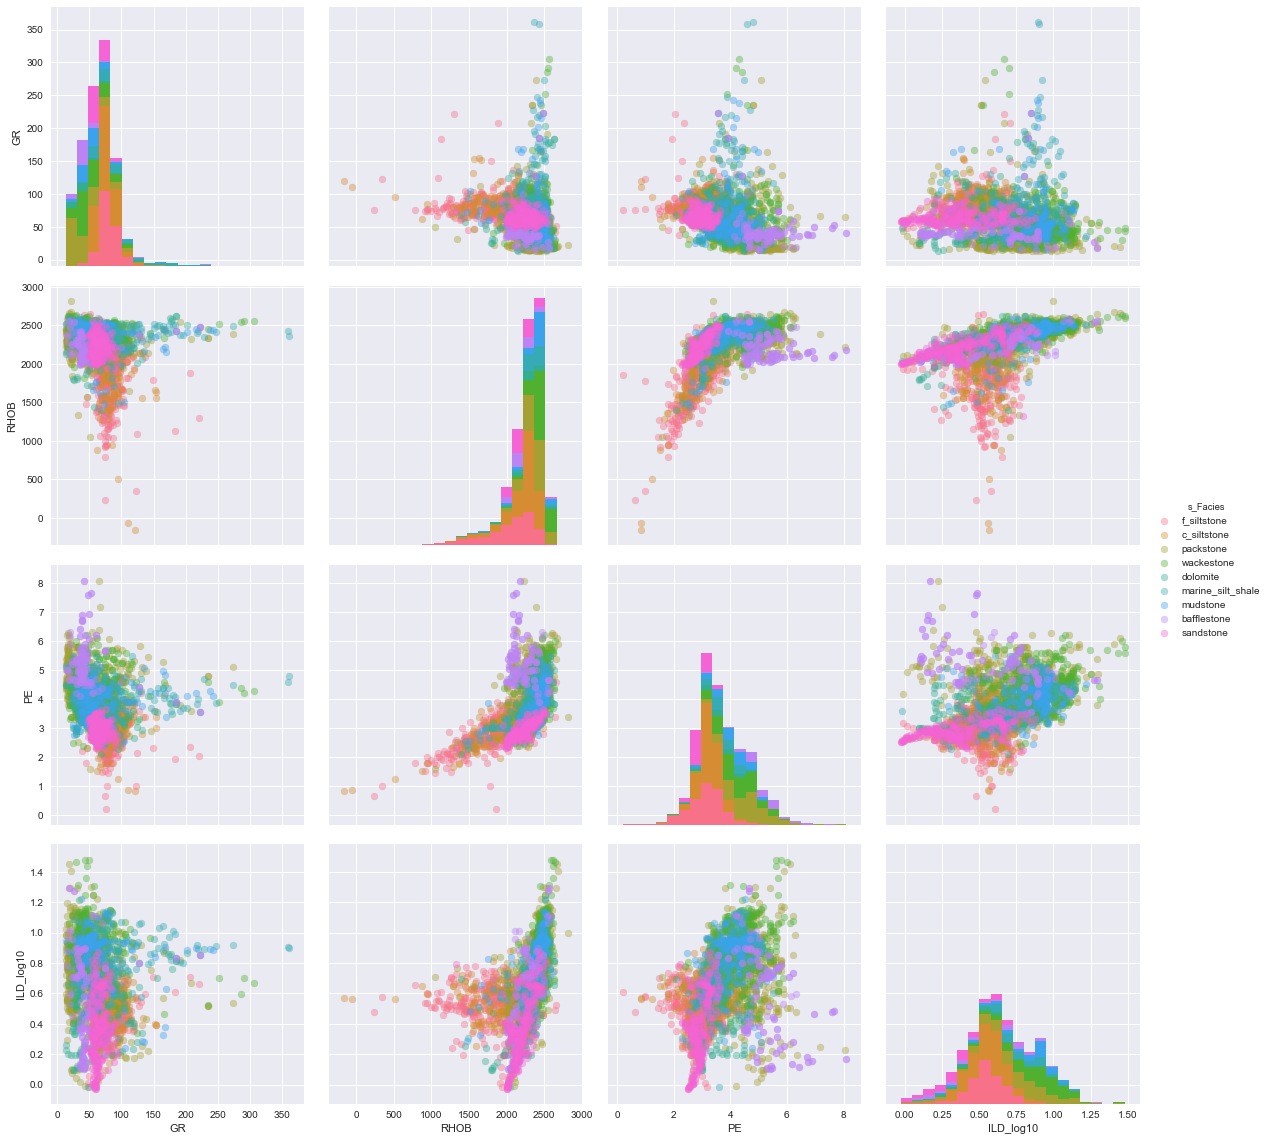

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib inline is to tell Jupyter to show me the plots in the interface

#hue = means all s_facies is under same hue colour
g = sns.PairGrid(df, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)

g.map_upper(plt.scatter,**dict(alpha=0.4))  
g.map_lower(plt.scatter,**dict(alpha=0.4))
g.map_diag(plt.hist,**dict(bins=20))  
g.add_legend()

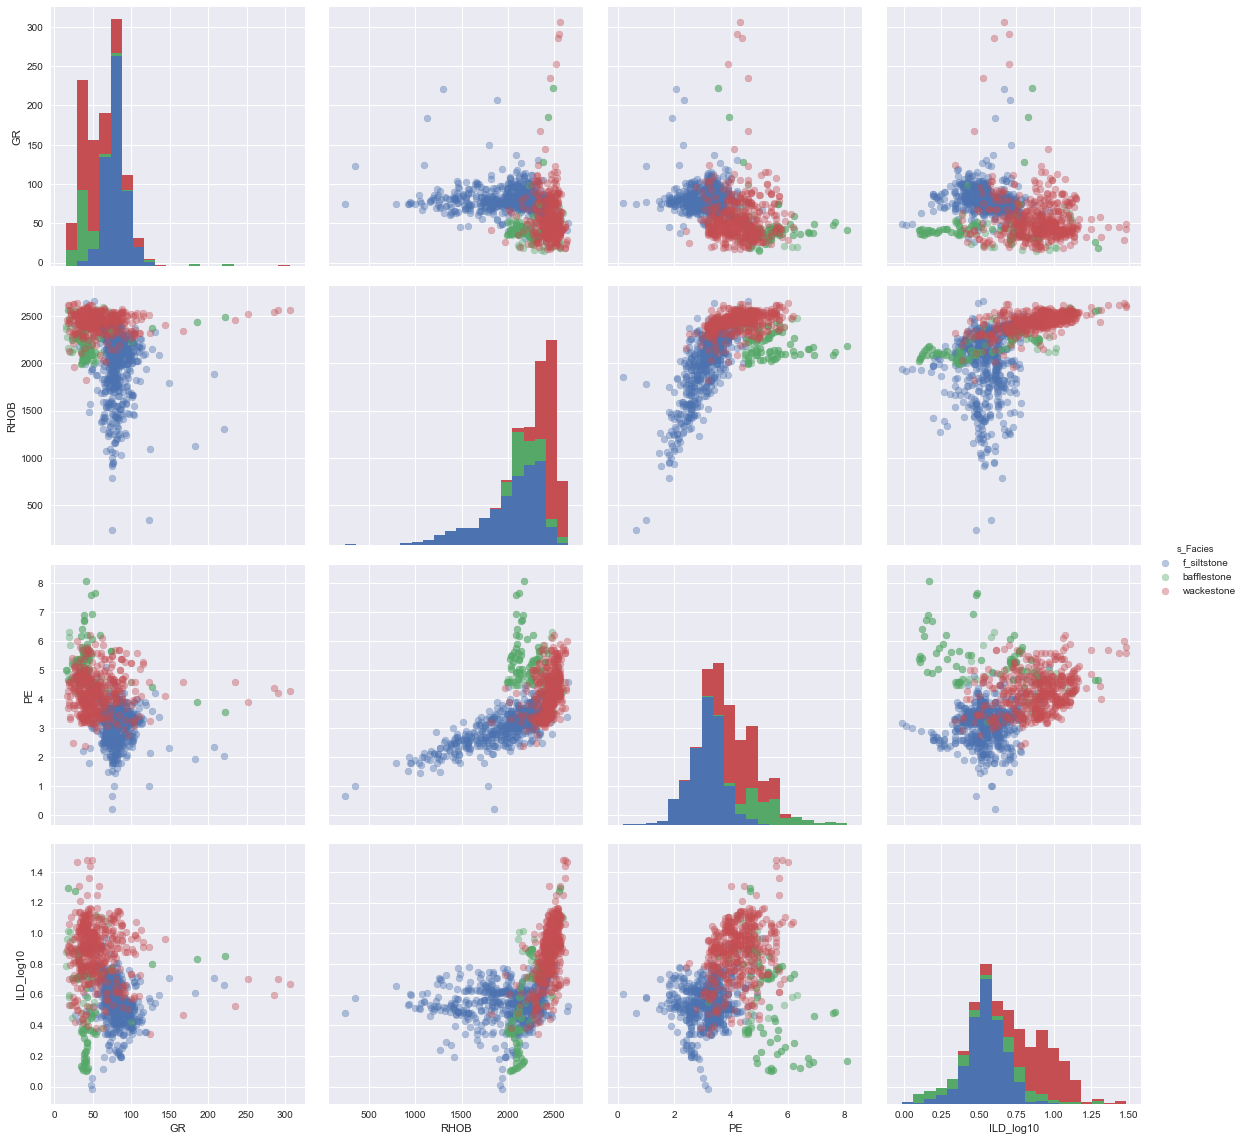

In [24]:
selected = ['f_siltstone', 'bafflestone', 'wackestone']

#map the lambda within the selected?
#pd.concat allows you to append different dataframes
#list of three dataframes, each with information on siltstone, bafflestone, wackestone and then append them tgt
dfs = pd.concat(list(map(lambda x: df[df.s_Facies == x], selected)))

g = sns.PairGrid(dfs, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist,**dict(bins=20))  
g.add_legend()

## Feature Engineering
Add PCA components? Average logs as function of depth?...

## Scikit-Learn Classifiers  

Let's create a model that classifies between three classes.
Ensemble methods (random forest, gradient boosted trees) are always the best method.  
* Choosing the right estimator: Often the hardest part of solving a machine learning problem can be finding the right estimator for the job. Different estimators are better suited for different types of data and different problems.  
* SKL only plays well with numpy arrays, multi-dimensional arrays. So we need to make new variables into non-DataFrame.  
* A lot of them is linear algebra. Some are literally linear algebra transformation x which produces Y. X matrices of features and Y arrays.  
* SKL is easy to apply, but less convenient when you have too much data like in distributed systems (in different places). Clustering or Parallel Computing. Most winning Kaggle projects don't use SKL, they only use SKL tools - but to train them they use different XGBoost (gradient boosted trees). Shallow and tabular winning method uses gradient boosting. LightGBM developed by Microsoft.  

In [33]:
# Make X and y
#Cast .as_matrix and .values to give you back 2D numpy array. Columns and indices (seen in pandas) are gone
X = dfs[['GR','RHOB','PE','ILD_log10']].as_matrix()
y = dfs['s_Facies'].values

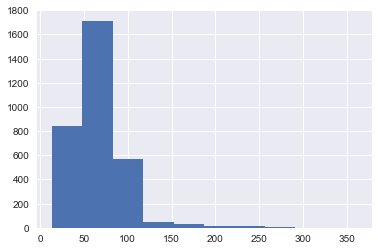

In [43]:
#show me histogram of gammaray
df.GR.hist()
#notice that the numbers differ in orders of magnitude

In [35]:
X
#returns 2D array which is what SKL expects

array([[  7.74500000e+01,   2.37695155e+03,   4.60000000e+00,
          6.64000000e-01],
       [  7.82600000e+01,   2.40103077e+03,   4.10000000e+00,
          6.61000000e-01],
       [  7.90500000e+01,   2.38874225e+03,   3.60000000e+00,
          6.58000000e-01],
       ..., 
       [  3.97190000e+01,   2.51192096e+03,   4.20300000e+00,
          1.08700000e+00],
       [  3.88440000e+01,   2.57735655e+03,   3.90800000e+00,
          1.10900000e+00],
       [  4.17190000e+01,   2.58380562e+03,   3.94300000e+00,
          1.10700000e+00]])

Some methods expect the data to be normalized (0 to 1, or -1 to 1). It's sometimes a good idea (common practice) of normalizing (scale it) it no matter which method you try.

In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

#default StandardScaler so the mean is 0 and stdev is 1

^ #shift+tab in the () of the Standard Scaler of () to see what it means. StandardScaler has a property called fit_transform. So if you have new data/new array as you scale X, then you have X already. All the values of X will be scaled with stdev to be 1 as well.

In [39]:
X
#notice that all of it now have -1 and 1

array([[ 0.38893741,  0.53441824,  0.76155539, -0.05305353],
       [ 0.41711003,  0.60748104,  0.27030408, -0.06548853],
       [ 0.44458703,  0.57019438, -0.22094722, -0.07792352],
       ..., 
       [-0.92338516,  0.94395163,  0.37150185,  1.70028104],
       [-0.95381855,  1.14250076,  0.08166358,  1.79147102],
       [-0.85382312,  1.16206897,  0.11605118,  1.78318102]])

(array([ 318.,  387.,  468.,   49.,    3.,    4.,    1.,    4.,    1.,    3.]),
 array([-1.78870209, -0.77647014,  0.23576181,  1.24799375,  2.2602257 ,
         3.27245764,  4.28468959,  5.29692153,  6.30915348,  7.32138543,
         8.33361737]),
 <a list of 10 Patch objects>)

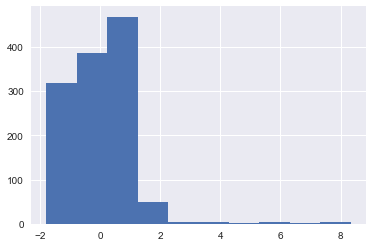

In [45]:
plt.hist(X[:,0])

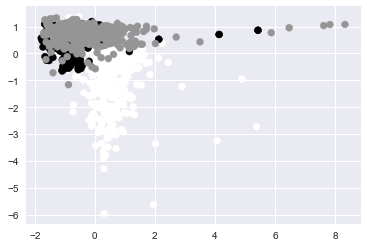

In [49]:
plt.scatter(X[:,0], X[:,1], c=dfs['Facies'].values)

Split the data into a training set and a test set. This is a key step in the process

In [52]:
#model_selection is a submodel from sklearn to use random selection of rows and use 
from sklearn.model_selection import train_test_split

#expect new X_train X_test, y_train, y_test  from the whole X, whole Y
#test_size = give me a whole one third as a testing data frame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#random_state is random seed. any random changes are not due to changes in splitting of data

## K-Nearest Neighbours
Source code [here](http://scikit-learn.org/stable/modules/neighbors.html)  
A fairly common method for classifying data is to use the _k-nearest neighbors algorithm_.  
The label of the object in question is determined by the neighbouring data points in the feature space used. Its most important parameter, `k`, is the number of neighbors you include to make a membership decision.  
kNN - biggest parameter  
It will take your X_train and map those into the multi-dimensional space.  
For any new value you want to ask your machine to label. It will take the nearest neighbour of the value to put it in.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

The next block is all you need to train a classifier model!

In [54]:
#clf is classifier
clf = KNeighborsClassifier()

#clf.fit is basically to tell it train whatever classifier that we define earlier.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

^ It uses these default value to train, we can do optimization.  
(Multi-parameter is how many neighbours you consider.)  
Hyper-parameterisation is what you usually do before.

Before we can move on to make predictions we need to create validation routines to make sure that the model we trained is _good_ and produces reasonble results. The most basic test is to look at how many good predictions we would make if we predict on our `Test` data.


In [55]:
#go row by row, make a prediction using test data.
score = clf.score(X_test, y_test)
print("The precision is {}%".format(np.round(score*100)))

The precision is 91.0%


* Fine print of scoring:  
  Didn't have consistent data set across facies, e.g. Class imbalance. One facies have only 1 or 2 label. This score doesn't tell you that.  
* This scoring is one of the metrics we can use to check the quality of the predictions. There are a large number of different metrics and depending on your data and problem you may need to find the one that adjusts better to your needs. Typically, a more robust metric that is often used is called F1. It combines the precision score and a recall score (how many true positive predictions were made). Scikit-learn gives a nice summary of these three metrics using classification_report.

In [57]:
#Combination of three different matrices that is more useful in scoring
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), digits=3))

             precision    recall  f1-score   support

bafflestone      0.821     0.902     0.860        51
f_siltstone      0.952     0.930     0.941       213
 wackestone      0.890     0.890     0.890       145

avg / total      0.914     0.912     0.912       409



**Precision**: how many good precision vs bad precision, it will do it for each value  
**Recall**: for all the ones you classify bafflestone correctly, how many are actually bafflestone  
**F1**: harmonic mean combination of precision and recall. how many good and bad you have and how many that is actually correct.   
**Support**: number of samples. Note that we have class imbalance, bafflestone only has 51 samples    
  
So...Classifier without modifications will come with default values that we can optimize  

In [59]:
# Generated array of values of k to try
nns = np.arange(1,60,2) 

In [67]:
# Loop over each value in `nns` and store the `F1 Score`

from sklearn.metrics import f1_score

acc = []
for n in nns:
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_pred, y_test, average='weighted')
    acc.append(score)
    


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-67-7166d63e30d8>, line 13)

What value of n gives us the best result?

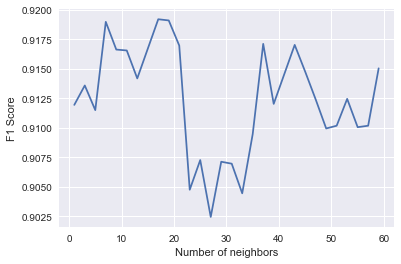

In [63]:
# How your F1 metric is maximized based on number of neighbours
plt.plot(nns,acc)
_ = plt.xlabel('Number of neighbors')
_ = plt.ylabel('F1 Score')

Train a `KNeighborsClassifier` using the optimal number of nearest neighbors and print its classification report

In [65]:
# Define a specific classifier with new number of neighbours 19

clf = KNeighborsClassifier(19)
clf.fit(X_train, y_train)

print("{:12} {}".format("KNN","-"*15))
print(classification_report(y_test, clf.predict(X_test), digits=3))

KNN          ---------------
             precision    recall  f1-score   support

bafflestone      0.815     0.863     0.838        51
f_siltstone      0.953     0.953     0.953       213
 wackestone      0.908     0.890     0.899       145

avg / total      0.920     0.919     0.920       409



p/s: PyTorch is ready for big data and deep learning.

## More Methods to Train Models!  

Let's pick 3 different classifiers to train different models and then compare how well they perform

In [69]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [
    SVC(),
    RandomForestClassifier(),
    MLPClassifier()
    ]

names = ["Linear SVM", "RandomForest", "Neural Network"]

In [70]:
classifiers
#tell

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, valida

In [71]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_test, clf.predict(X_test), digits=3))

Linear SVM   ---------------
             precision    recall  f1-score   support

bafflestone      0.920     0.902     0.911        51
f_siltstone      0.948     0.934     0.941       213
 wackestone      0.879     0.903     0.891       145

avg / total      0.920     0.919     0.920       409

RandomForest ---------------
             precision    recall  f1-score   support

bafflestone      0.845     0.961     0.899        51
f_siltstone      0.944     0.944     0.944       213
 wackestone      0.913     0.869     0.890       145

avg / total      0.920     0.919     0.919       409

Neural Network ---------------
             precision    recall  f1-score   support

bafflestone      0.915     0.843     0.878        51
f_siltstone      0.952     0.939     0.946       213
 wackestone      0.868     0.910     0.889       145

avg / total      0.918     0.917     0.917       409



Try more methods!

## Parameter Selection

Many of the models can be improved (or worsened) by changing the parameters that internally make the method work. It's always a good idea to check the documentation of each model (e.g. RandomForestClassifier [docs](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). This process is usually called _hyperparameter tuning_.  

Scikit-learn offers a simple way to test different parameters for each model through a function called `GridSearchCV`  

In [74]:
from sklearn.model_selection import GridSearchCV
#create every combination of all ... score it and give you back all the classifier.
from sklearn.metrics import make_scorer as msc

# Select the parameters and values for each one to test
# n_estimators is how many decision trees I want to make in my random forest 1 to 100 in steps of 5
# max_depth - for each tree how complex how many leaves/branches you allow it to happen
parameters = {'n_estimators':np.arange(1,100,5),
              'max_depth':np.arange(1,50,5)}

rfc = RandomForestClassifier()

#Classifier is define by Gridsearch, which is based on the rfc and parameters defined earlier
#cv = define how many times you want to split
clf = GridSearchCV(rfc, parameters, scoring = msc(f1_score,**{'average':'weighted'}), cv=3, n_jobs=8)

clf.fit(X_train, y_train) 
#and grid search will do its thing

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]), 'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

How does the parameter space look like with respect to the score of the classifier?

In [75]:
scores = clf.cv_results_['mean_test_score']
max_depths = clf.cv_results_["param_max_depth"].data.astype(int)
n_estimators = clf.cv_results_["param_n_estimators"].data.astype(int)

In [76]:
#it will tell you which classifier is the best to use.
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=41, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [77]:
X_size = len(np.unique(max_depths))
Y_size = len(np.unique(n_estimators))
X = max_depths.reshape((X_size, Y_size))
Y = n_estimators.reshape((X_size, Y_size))
Z = scores.reshape((X_size, Y_size))

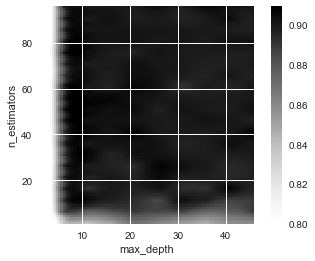

In [78]:
import scipy.interpolate

# Set up a regular grid of interpolation points
xi, yi = np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(X, Y, Z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=0.8, vmax=Z.max(), origin='lower',
           extent=[X.min(), X.max(), Y.min(), Y.max()], aspect=X.max()/Y.max())
# plt.scatter(X, Y, c=Z)
plt.colorbar()

_ = plt.ylabel('n_estimators')
_ = plt.xlabel('max_depth')

`clf` can now tell us the best parameters to use with our `RandomForestClassifier`

In [79]:
#from the coupled parameters you gave it which one is the best
clf.best_params_

{'max_depth': 41, 'n_estimators': 16}

In [80]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=41, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

The nice thing about scikit-learn's methods is that they're all consistent and behave in the same way. Notice howGridSearchCV was .fit(). That means that we can use it to .predict() and it will automatically use the best set of parameters!

In [81]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

bafflestone      0.943     0.980     0.962        51
f_siltstone      0.943     0.934     0.939       213
 wackestone      0.903     0.903     0.903       145

avg / total      0.929     0.929     0.929       409



It's also helpful to summarize the prediction tests using a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Scikit-learn has a function for that!

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 50,   0,   1],
       [  1, 199,  13],
       [  2,  12, 131]])

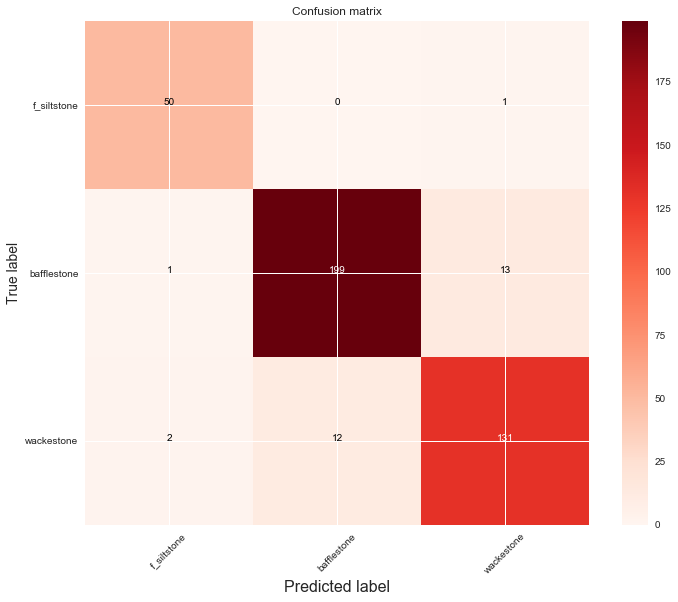

In [95]:
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

title = 'Confusion matrix'
cmap = plt.cm.Reds

# Plot non-normalized confusion matrix
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(selected))
plt.xticks(tick_marks, selected, rotation=45)
plt.yticks(tick_marks, selected)

# Print the support numbers inside the plot
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
_ = plt.ylabel('True label', fontsize=14)
_ = plt.xlabel('Predicted label', fontsize=16)

#to get figure get current figure
plt.gcf().set_size_inches(10,10)

* Sometimes is better to normalize the confusion matrix in cases where support numbers are highly unbalanced. Write a version of the confusion matrix plot with the support values normalized!

In [86]:
from sklearn.externals import joblib
#to bundle up the classifier clf gridsearch and save it for future reference

In [90]:
joblib.dump(clf, 'facies_model.pkl')
#anything on python you can pickle, it will store anything that SKL needs on a python.
#Dump it as nameless object

['facies_model.pkl']

How do you load saved model?

In [88]:
clf = joblib.load('facies_model.pkl')
#overwrote the initial clf with this loaded version

In [89]:
X_test.shape

(409, 4)

Next bit of code: Make http request

In [91]:
import requests

multipart_form_data =  {
                        'file': ('npArray', X_test.flatten().tobytes(), 'application/octet-stream'),
                        'shape': ('arrShape', str(X_test.shape), 'text/plain')
                        }

res = requests.post(url='http://0.0.0.0:5000/predict_from_array',
                         files=multipart_form_data)

encoded_predictions = np.frombuffer(res.content, dtype=np.int8)

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=5000): Max retries exceeded with url: /predict_from_array (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x00000140E070BBA8>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context',))

In [92]:
encoded_predictions

NameError: name 'encoded_predictions' is not defined

In [93]:
enc = joblib.load('facies_encoder.pkl')
enc.inverse_transform(encoded_predictions)

FileNotFoundError: [Errno 2] No such file or directory: 'facies_encoder.pkl'

CNN - good at segmentating image to extract features. and you continue to extract features on top on it and turn it into an extracted tabular table.